In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
data = pd.read_csv(r'D:\Datasets\water_potability.csv')
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
data.shape

In [3]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [4]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [5]:
data.fillna(data.mean(),inplace=True)
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [13]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

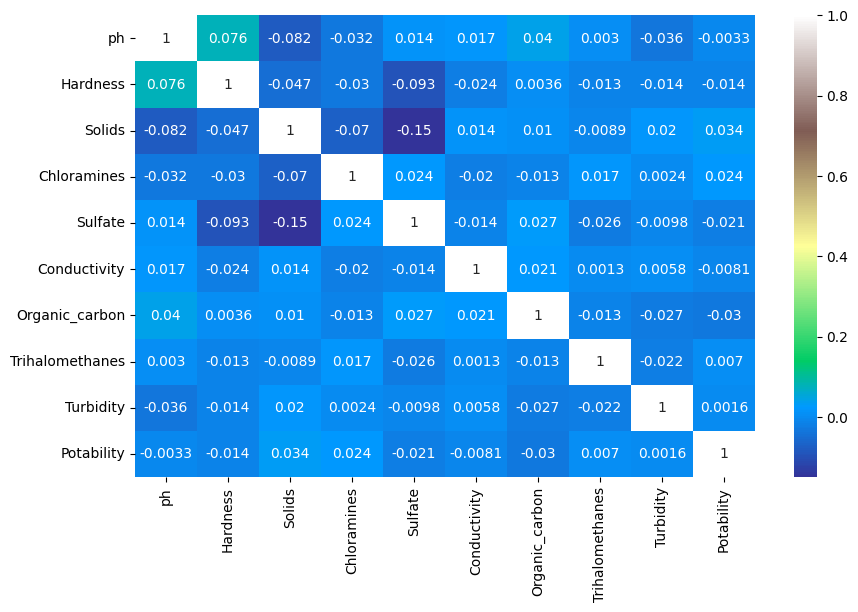

In [48]:
sns.heatmap(data.corr(),annot=True,cmap='terrain')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

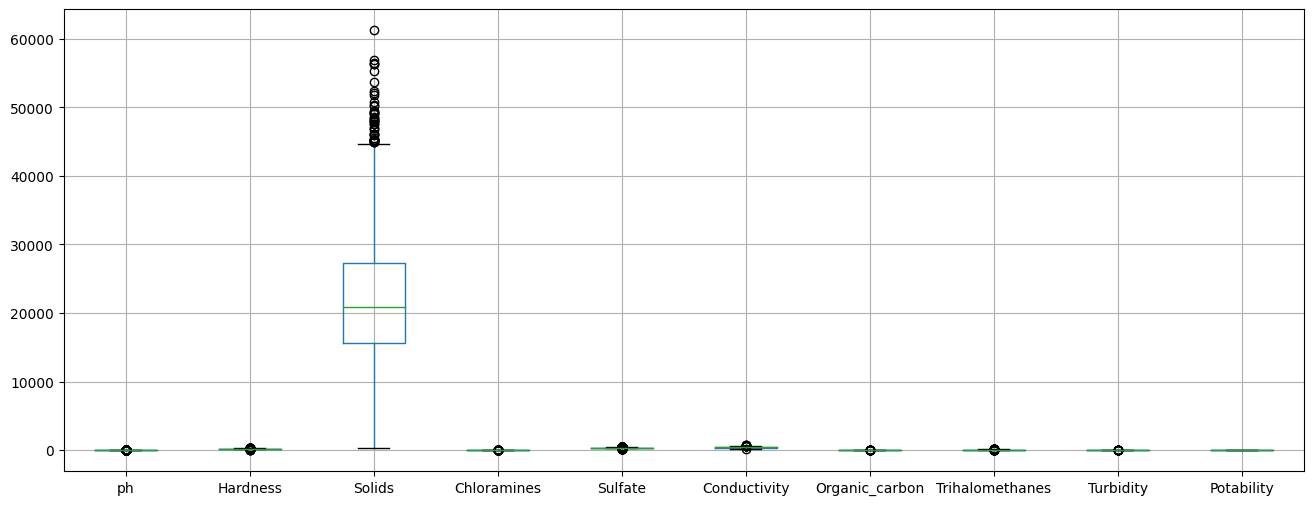

In [49]:
data.boxplot(figsize=(16,6))
plt.show()

In [50]:
data['Solids'].describe()

count     3276.000000
mean     22014.092526
std       8768.570828
min        320.942611
25%      15666.690297
50%      20927.833607
75%      27332.762127
max      61227.196008
Name: Solids, dtype: float64

In [53]:
data['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

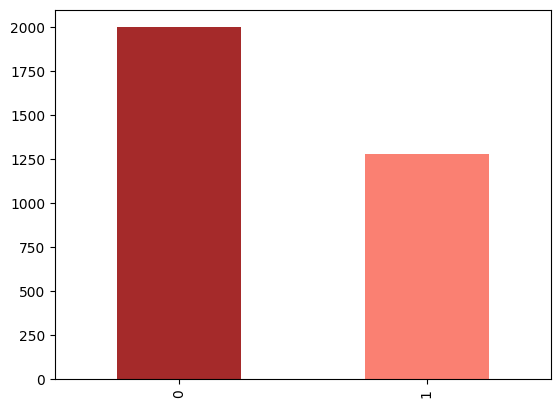

In [60]:
data.Potability.value_counts().plot(kind="bar", color=["brown", "salmon"])
plt.show()

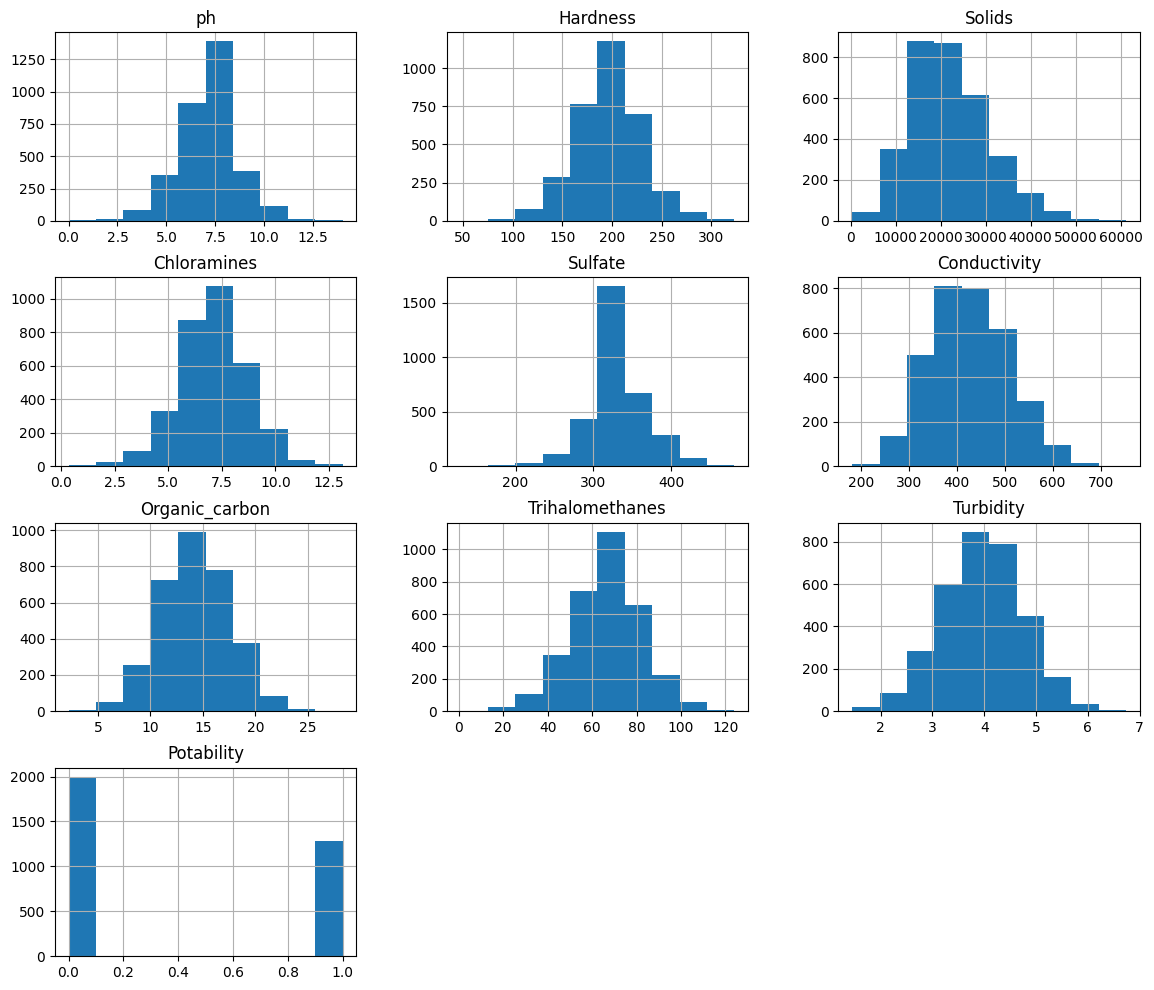

In [59]:
data.hist(figsize=(14,12))
plt.show()

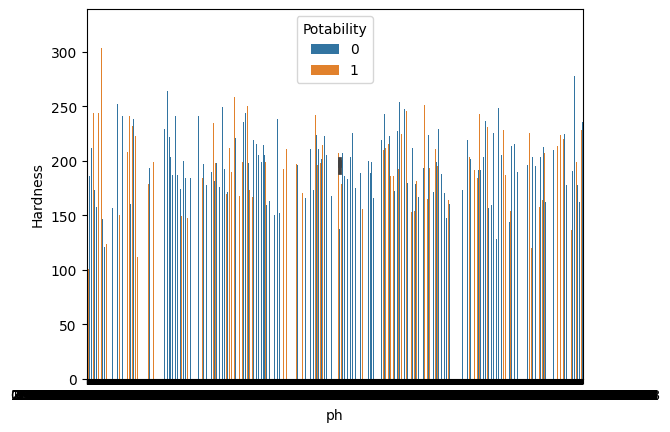

In [61]:
sns.barplot(x=data['ph'],y=data['Hardness'],hue=data['Potability'])
plt.show()

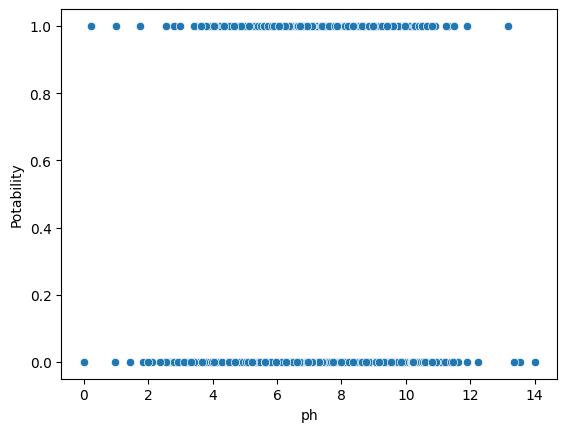

In [51]:
sns.scatterplot(x=data['ph'],y=data['Potability'])
plt.show()

In [6]:
X = data.drop('Potability', axis=1)

In [7]:
Y = data['Potability']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, shuffle=True, random_state=0)
X_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2128,5.514748,228.735924,35343.628580,4.346608,333.775777,526.112381,14.930982,46.780508,2.798158
1519,7.080795,210.732854,13671.416030,8.546187,418.470551,352.252328,10.353659,45.304007,3.364891
40,7.080795,233.858996,11703.923907,4.599388,309.039320,349.399633,18.338893,42.677465,3.510004
1151,4.303575,227.007086,7323.302301,7.490508,326.695199,412.896404,12.906730,68.748918,2.010537
2404,9.624727,217.372780,25175.754158,9.883946,329.174454,394.054835,20.277571,85.840258,2.615257
...,...,...,...,...,...,...,...,...,...
835,7.440825,183.362713,17259.852302,4.610245,335.626443,452.995293,9.700906,80.537065,2.496343
3264,5.893103,239.269481,20526.666156,6.349561,341.256362,403.617560,18.963707,63.846319,4.390702
1653,6.648005,191.841801,15176.290678,5.661663,333.775777,471.047129,15.438287,56.532387,3.829784
2607,7.675914,233.300759,23673.100606,8.407497,333.775777,232.613624,18.459408,60.993590,5.040461


In [10]:
Y_train

2128    0
1519    1
40      0
1151    1
2404    1
       ..
835     0
3264    1
1653    0
2607    0
2732    1
Name: Potability, Length: 2620, dtype: int64

In [10]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion= 'entropy', min_samples_split= 9, splitter='best')

In [11]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=9)

In [20]:
X_test

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2017,8.111953,217.266472,38184.469574,7.254122,311.910224,281.069203,13.027921,78.582094,4.430750
2533,6.768060,179.805992,23793.031358,5.332099,333.198191,461.530446,13.557381,60.571241,4.145807
589,7.080795,180.893036,17705.608616,6.223312,350.195253,447.937123,10.461025,32.074863,3.999125
482,7.705711,178.922858,18476.619166,8.226228,334.889911,518.043369,10.638798,63.157489,3.861956
2620,5.830542,165.467025,30021.257079,8.433097,334.397777,494.154505,16.666613,69.580253,5.192117
...,...,...,...,...,...,...,...,...,...
2802,5.230454,152.094169,24790.724599,6.308730,388.998079,307.918075,12.594197,51.625213,3.695615
1120,7.444914,203.068746,25489.075026,8.175744,413.560378,405.420612,13.283100,74.412867,2.571392
601,7.080795,220.552524,28135.076838,7.978098,307.652451,421.464253,17.532298,86.848098,3.569570
2381,4.945695,170.440921,23000.723137,4.433725,340.645670,346.642267,13.276638,84.551081,3.782517


In [21]:
Y_test

2017    1
2533    0
589     0
482     0
2620    0
       ..
2802    1
1120    1
601     0
2381    1
98      0
Name: Potability, Length: 656, dtype: int64

In [12]:
Y_prediction = dt.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix


In [14]:
accuracy_score(Y_prediction,Y_test) * 100

62.04268292682927

In [66]:
confusion_matrix(Y_prediction, Y_test)

array([[291, 131],
       [121, 113]], dtype=int64)

In [67]:
res = dt.predict([[7.080795,210.732854,13671.416030,8.546187,418.470551,352.252328,10.353659,45.304007,3.364891]])[0]
res

C:\Users\91901\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1

In [68]:
Y_test.shape

(656,)

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
dt = DecisionTreeClassifier()
criterion = ["gini","entropy"]
splitter = ["best","random"]
min_samples_split=range(1,10)
parameters = dict(criterion=criterion, splitter= splitter, min_samples_split=min_samples_split)
cv= RepeatedStratifiedKFold(n_splits=5, random_state=101)
grid_search_cv_dt = GridSearchCV(estimator=dt, param_grid = parameters,scoring='accuracy', cv=cv)

In [17]:
grid_search_cv_dt.fit(X_train,Y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=101),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': range(1, 10),
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [18]:
print(grid_search_cv_dt.best_params_)

{'criterion': 'entropy', 'min_samples_split': 9, 'splitter': 'random'}


In [19]:
prediction_grid = grid_search_cv_dt.predict(X_test)

In [20]:
accuracy_score(prediction_grid,Y_test) *100

58.079268292682926

In [52]:
confusion_matrix(Y_test,prediction_grid)

array([[289, 123],
       [136, 108]], dtype=int64)

In [119]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, Y_train)
Y_pred = regressor.predict(X_test)

In [17]:
from sklearn import metrics

In [121]:
metrics.r2_score(Y_test, Y_pred) * 100

10.317279961801706

In [47]:
regressor.predict([[7.080795,210.732854,13671.416030,8.546187,418.470551,352.252328,10.353659,45.304007,3.364891]])

C:\Users\91901\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([1.])

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn=KNeighborsClassifier(metric='manhattan', n_neighbors=22)
knn.fit(X_train,Y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=22)

In [24]:
prediction_knn=knn.predict(X_test)
accuracy_knn=accuracy_score(Y_test,prediction_knn)*100
print('accuracy_score score : ',accuracy_score(Y_test,prediction_knn)*100,'%')

accuracy_score score     :  61.12804878048781 %


In [28]:

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [29]:

# fit model no training data
model = XGBClassifier()
model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [30]:
print(model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


In [31]:
# make predictions for test data
y_pre = model.predict(X_test)
predictions = [round(value) for value in y_pre]

In [32]:
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 64.94%


In [25]:
from sklearn.ensemble import AdaBoostClassifier

In [66]:
abc=AdaBoostClassifier(n_estimators=100, learning_rate=1)
model=abc.fit(X_train,Y_train)
prediction_abc=model.predict(X_test)

In [67]:
print("Accuracy:",metrics.accuracy_score(Y_test, prediction_abc)* 100, '%')

Accuracy: 64.02439024390245 %


In [61]:
from sklearn.ensemble import ExtraTreesClassifier


In [71]:
etc=ExtraTreesClassifier(n_estimators=900, random_state=1)
model_etc=etc.fit(X_train,Y_train)
prediction_etc=model_etc.predict(X_test)

In [93]:
print("Accuracy:",metrics.accuracy_score(Y_test, prediction_etc)* 100, '%')

Accuracy: 69.8170731707317 %


In [133]:
from sklearn.ensemble import RandomForestClassifier

In [151]:
rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(X_train, Y_train)
prediction_rf = rf.predict(X_test)

In [152]:
from sklearn.metrics import classification_report
rand_score = rf.score(X_test, Y_test)
classification_report_rf = classification_report(Y_test, prediction_rf)

In [153]:
print("Accuracy score:", rand_score * 100)

Accuracy score: 69.66463414634147


In [4]:
from sklearn import svm, datasets

In [ ]:
sm = svm.SVC(kernel='linear', C=1).fit(X_train, Y_train)

In [18]:
sm_predict = sm.predict(X_test)
print(accuracy_score(Y_test, sm_predict)* 100)

62.80487804878049


In [14]:
from sklearn.ensemble import ExtraTreesClassifier

In [15]:
etc=ExtraTreesClassifier(n_estimators=900, random_state=1)
model_etc=etc.fit(X_train,Y_train)
prediction_etc=model_etc.predict(X_test)

In [18]:
print("Accuracy:",metrics.accuracy_score(Y_test, prediction_etc)* 100, '%')

Accuracy: 69.8170731707317 %


In [ ]:
pickle.dump(model_etc, open('model.pkl', 'wb'))
model = pickel.load(open('mod'))